In [1]:
import pandas as pd

In [2]:
images_train = pd.read_csv('image_train.csv')

In [3]:
images_train.head()

,id,image,label,deep_features,image_array
0,24,Height: 32 Width: 32,bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...
1,33,Height: 32 Width: 32,cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...
2,36,Height: 32 Width: 32,cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...
3,70,Height: 32 Width: 32,dog,[1.1298 0 0 0.778194 0 0.758051 9.83053 0 0 0....,[154 179 152 159 183 157 165 189 162 174 199 1...
4,90,Height: 32 Width: 32,bird,[1.71787 0 0 0 0 0 9.33936 0 0 0 0 0 0.412137 ...,[216 195 180 201 178 160 210 184 164 212 188 1...


In [61]:
import matplotlib.pyplot as plt

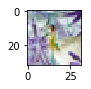

In [63]:
from array import array
import numpy as np
fig, ax = plt.subplots(figsize=(1, 1))
ax.imshow(np.asarray(images_train.head(1)['image_array'][0][1:-1].split()).astype(np.float).reshape((32, 32, 3)))
plt.show()

In [64]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

In [77]:
images_train['img_array'] = images_train['image_array'].apply(lambda x: np.asarray(x[1:-1].split()).astype(np.float))
#print np.asarray(images_train['image_array'][0][1:-1].split()).astype(np.float)

In [78]:
images_train.head()

,id,image,label,deep_features,image_array,img_array
0,24,Height: 32 Width: 32,bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...,"[73.0, 77.0, 58.0, 71.0, 68.0, 50.0, 77.0, 69...."
1,33,Height: 32 Width: 32,cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...,"[7.0, 5.0, 8.0, 7.0, 5.0, 8.0, 5.0, 4.0, 6.0, ..."
2,36,Height: 32 Width: 32,cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...,"[169.0, 122.0, 65.0, 131.0, 108.0, 75.0, 193.0..."
3,70,Height: 32 Width: 32,dog,[1.1298 0 0 0.778194 0 0.758051 9.83053 0 0 0....,[154 179 152 159 183 157 165 189 162 174 199 1...,"[154.0, 179.0, 152.0, 159.0, 183.0, 157.0, 165..."
4,90,Height: 32 Width: 32,bird,[1.71787 0 0 0 0 0 9.33936 0 0 0 0 0 0.412137 ...,[216 195 180 201 178 160 210 184 164 212 188 1...,"[216.0, 195.0, 180.0, 201.0, 178.0, 160.0, 210..."


In [79]:
images_train.img_array.apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,73.0,77.0,58.0,71.0,68.0,50.0,77.0,69.0,44.0,120.0,...,46.0,100.0,134.0,55.0,72.0,97.0,38.0,48.0,59.0,29.0
1,7.0,5.0,8.0,7.0,5.0,8.0,5.0,4.0,6.0,7.0,...,82.0,83.0,83.0,76.0,67.0,74.0,81.0,114.0,120.0,119.0
2,169.0,122.0,65.0,131.0,108.0,75.0,193.0,196.0,192.0,218.0,...,229.0,223.0,223.0,223.0,221.0,221.0,221.0,220.0,220.0,220.0
3,154.0,179.0,152.0,159.0,183.0,157.0,165.0,189.0,162.0,174.0,...,119.0,132.0,148.0,135.0,136.0,149.0,137.0,146.0,157.0,146.0
4,216.0,195.0,180.0,201.0,178.0,160.0,210.0,184.0,164.0,212.0,...,10.0,33.0,29.0,20.0,42.0,38.0,29.0,30.0,26.0,17.0
5,33.0,44.0,27.0,29.0,44.0,31.0,32.0,45.0,34.0,38.0,...,66.0,100.0,108.0,63.0,81.0,94.0,47.0,71.0,90.0,40.0
6,97.0,51.0,31.0,104.0,58.0,38.0,107.0,61.0,40.0,107.0,...,65.0,133.0,87.0,66.0,131.0,86.0,65.0,128.0,84.0,63.0
7,93.0,96.0,88.0,102.0,106.0,97.0,117.0,121.0,111.0,118.0,...,65.0,72.0,57.0,45.0,65.0,52.0,41.0,86.0,72.0,63.0
8,35.0,59.0,53.0,36.0,56.0,56.0,42.0,62.0,64.0,40.0,...,31.0,33.0,50.0,32.0,35.0,52.0,33.0,35.0,51.0,32.0
9,205.0,193.0,195.0,200.0,187.0,193.0,202.0,190.0,193.0,173.0,...,221.0,230.0,222.0,219.0,220.0,213.0,208.0,223.0,216.0,208.0
